In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [84]:
# Imputs
r = 0.05 #anual growth rate
IS = 10 # size of a banana pile (measured in weith or in number of banana/mango in the block)
iIFR = 100 #innitial Item Frequency = Number of Mangos/bananas per day
ILT = 50  #Item Life time = How long the mango/banana should live
n = 365  #period per year, indicate that we are measuring growth per day


In [85]:
# t = [i for i in range(365 * 2 + 1)] # Take time on the span of 10 years

## Constant and steady growth model

In [86]:
# Compute the SoT functions (SoT, DSoT = Size over time, Dynanmic Size over time)

def SoT(r, IS, iIFR, ILT, time):
    SoT_array = []
    iSoT = 0
    for t in range(time + 1):
        iSoT += iIFR * IS * (1 + r/n)**(n*t) 
        SoT_array.append(iSoT)
    return SoT_array  

def G(r, n, t):
    return 0 if t < ILT else (1 + r/n)**(n*t)

def DSoT(r, IS, iIFR, ILT, time):
    DSoT_array = []
    iSoT = 0
    for t in range(time + 1):
        iSoT += iIFR * IS * ((1 + r/n)**(n*t) - G(r, n, t))
        DSoT_array.append(iSoT)
    return DSoT_array  

In [87]:
# Call and draw the two graphs
time = 365 * 10
SoT_array = SoT(r, IS, iIFR, ILT, time)
DSoT_array = DSoT(r, IS, iIFR, ILT, time)

ratio = np.array(DSoT_array)/np.array(SoT_array)
ratio2 = np.array(SoT_array)/np.array(DSoT_array)
print SoT_array[:10]

print DSoT_array[:10]


[1000.0, 2051.267496467447, 3156.4308455963815, 4318.253152822736, 5539.63918108062, 6823.642613227604, 8173.473686796374, 9592.507220160982, 11084.291050184549, 12652.554902444044]
[1000.0, 2051.267496467447, 3156.4308455963815, 4318.253152822736, 5539.63918108062, 6823.642613227604, 8173.473686796374, 9592.507220160982, 11084.291050184549, 12652.554902444044]


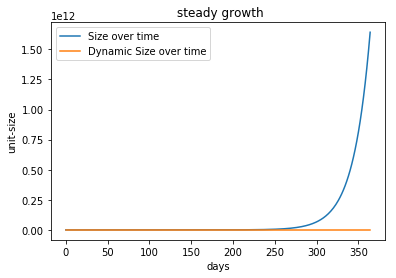

In [88]:
# plot
horizon = 365
plt.plot(SoT_array[:horizon])
plt.plot(DSoT_array[:horizon])
plt.xlabel('days')
plt.ylabel('unit-size')
plt.legend(['Size over time', 'Dynamic Size over time'], loc='upper left')
plt.title(' steady growth')
plt.show()

In [89]:
# # plot ratio

# plt.plot(ratio[:horizon])
# # plt.plot(t, DSoT_array)
# plt.legend(['ratio of gowths'], loc='upper right')
# plt.show()

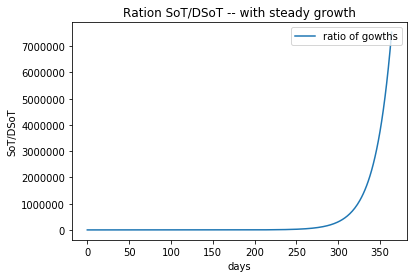

In [90]:
# plot ratio2

plt.plot(ratio2[:horizon])
plt.xlabel('days')
plt.ylabel('SoT/DSoT')
plt.legend(['ratio of gowths'], loc='upper right')
plt.title('Ration SoT/DSoT -- with steady growth')
plt.show()

## Variable growth Model

growth within the same order of magnitude

In [91]:
years = 50
growth = [1]+[np.random.uniform(low=0.0, high=3.0) for i in range(n*years)]
print growth[:10]

[1, 0.9189509334467243, 2.043466043971927, 2.339956837429124, 1.4081240942124804, 1.5846017723588859, 1.396925954786468, 0.847833617166563, 1.7669959298837683, 1.6183347378298212]


In [92]:
# Compute the SoT functions (SoT, DSoT = Size over time, Dynanmic Size over time)

def SoT(r, IS, iIFR, ILT, growth):
    SoT_array = []
    SoL = 0 #size of the ledger initially equal to zero
    for g in growth:
        SoL += iIFR * g * IS 
        SoT_array.append(SoL)
    return SoT_array  

def G(ILT, i):
    return 0 if i < ILT else growth[i - ILT]

def DSoT(r, IS, iIFR, ILT, growth):
    DSoT_array = []
    SoL = 0
    for i in range(len(growth)):
        SoL += iIFR * IS * ((growth[i] - G(ILT, i)))
        DSoT_array.append(SoL)
    return DSoT_array 

In [93]:
# Call and draw the two graphs

SoT_array = SoT(r, IS, iIFR, ILT, growth)
DSoT_array = DSoT(r, IS, iIFR, ILT, growth)

ratio = np.array(DSoT_array)/np.array(SoT_array)
ratio2 = np.array(SoT_array)/np.array(DSoT_array)
print SoT_array[:10]
print DSoT_array[:10]


[1000, 1918.9509334467243, 3962.416977418651, 6302.373814847775, 7710.497909060256, 9295.099681419142, 10692.02563620561, 11539.859253372173, 13306.85518325594, 14925.189921085761]
[1000, 1918.9509334467243, 3962.416977418651, 6302.373814847775, 7710.497909060256, 9295.099681419142, 10692.02563620561, 11539.859253372173, 13306.85518325594, 14925.189921085763]


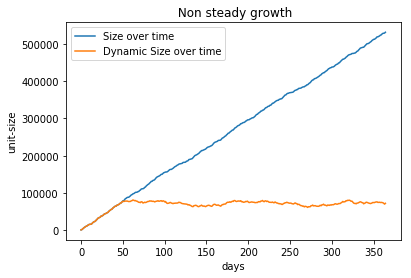

In [94]:
# plot
horizon = 365
plt.plot(SoT_array[:horizon])
plt.plot(DSoT_array[:horizon])
plt.xlabel('days')
plt.ylabel('unit-size')
plt.legend(['Size over time', 'Dynamic Size over time'], loc='upper left')
plt.title(' Non steady growth')
plt.show()

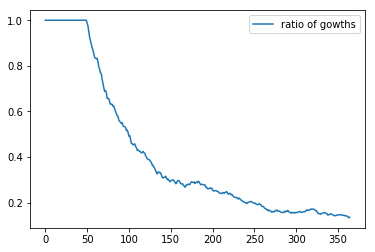

In [95]:
# plot ratio

plt.plot(ratio[:horizon])
plt.legend(['ratio of gowths'], loc='upper right')
plt.show()

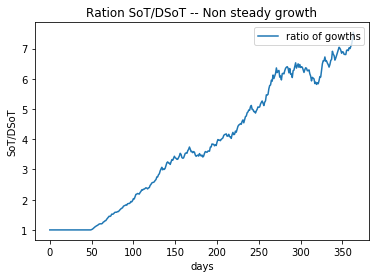

In [96]:
# plot ratio2

plt.plot(ratio2[:horizon])
plt.xlabel('days')
plt.ylabel('SoT/DSoT')
plt.legend(['ratio of gowths'], loc='upper right')
plt.title('Ration SoT/DSoT -- Non steady growth')
plt.show()


growth by an order of Magnitude

In [97]:
growth = [1]+[np.random.uniform(low=0.0, high=11.0) for i in range(n*years)]
print growth[:10]

[1, 4.005886319600947, 10.014900258023157, 9.056612992716236, 4.158878656804894, 2.399377615503525, 1.7683653995031134, 0.44382808519568295, 5.798094263830143, 4.753555634286812]


In [98]:
# Call and draw the two graphs
SoT_array = SoT(r, IS, iIFR, ILT, growth)
DSoT_array = DSoT(r, IS, iIFR, ILT, growth)

ratio = np.array(DSoT_array)/np.array(SoT_array)
ratio2 = np.array(SoT_array)/np.array(DSoT_array)
print SoT_array[:10]
print DSoT_array[:10]

[1000, 5005.886319600947, 15020.786577624105, 24077.39957034034, 28236.278227145234, 30635.65584264876, 32404.021242151874, 32847.849327347554, 38645.9435911777, 43399.49922546451]
[1000, 5005.886319600947, 15020.786577624105, 24077.39957034034, 28236.278227145234, 30635.65584264876, 32404.021242151874, 32847.849327347554, 38645.9435911777, 43399.49922546451]


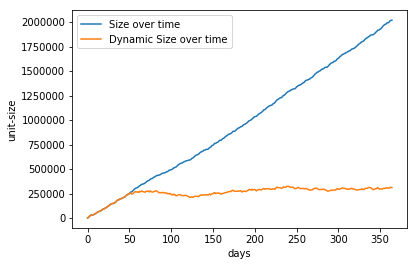

In [99]:
# plot
horizon = 365 #number of days

plt.plot(SoT_array[:horizon])
plt.plot(DSoT_array[:horizon])
plt.xlabel('days')
plt.ylabel('unit-size')
plt.legend(['Size over time', 'Dynamic Size over time'], loc='upper left')
plt.show()

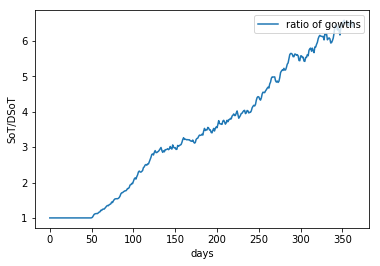

In [100]:
# plot ratio2

plt.plot(ratio2[:horizon])
plt.xlabel('days')
plt.ylabel('SoT/DSoT')
plt.legend(['ratio of gowths'], loc='upper right')
plt.show()